<a href="https://colab.research.google.com/github/youngnamh/PyTorch/blob/main/03_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn

#import torch vision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


# Getting a dataset

In [3]:
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)



100%|██████████| 26421880/26421880 [00:03<00:00, 8362054.51it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 305571.31it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5485141.98it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 13453132.08it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
device = 'cuda' if torch.cuda.is_available() else "cpu"
device

'cpu'

In [5]:
len(train_data), len(test_data)

(60000, 10000)

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [9]:
print(f'Image shape: {image.shape} -> [color_channels, height, width]')
print(f'Image label: {class_names[label]}')

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


Image shape: torch.Size([1, 28, 28])


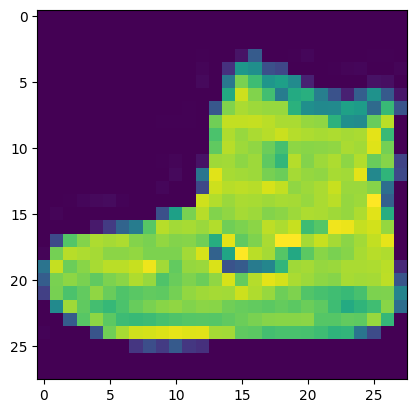

In [10]:
import matplotlib.pyplot as plt
image,label = train_data[0]
print(f'Image shape: {image.shape}')
plt.imshow(image.squeeze())

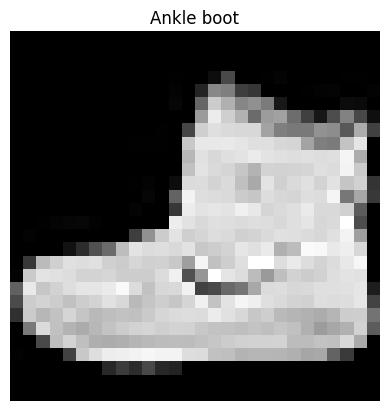

In [11]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

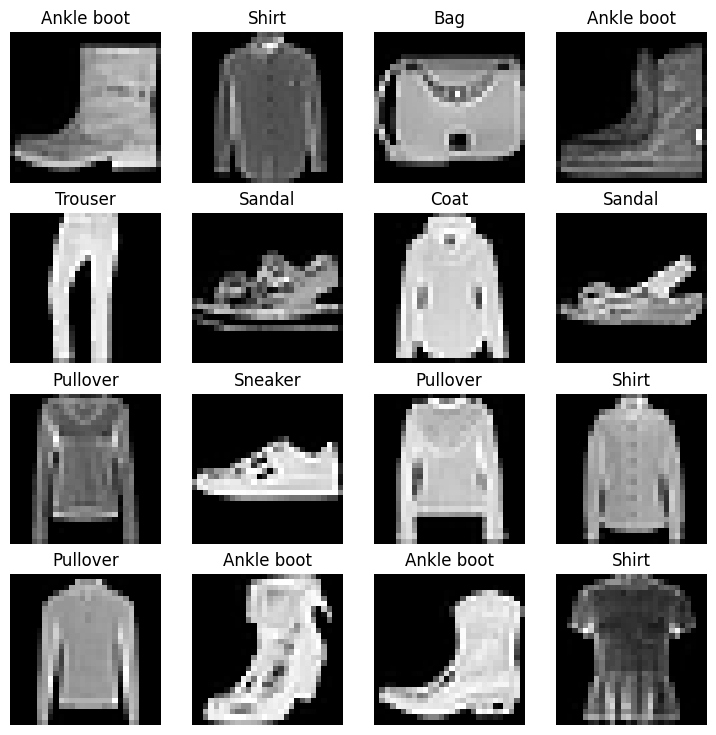

In [12]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

In [13]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

Split data into bacthes and make them iterable over pytorch

In [14]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79d57c2c3160>,
 <torch.utils.data.dataloader.DataLoader at 0x79d57c2c05e0>)

In [15]:
print(f'DataLoaders: {train_dataloader, test_dataloader}')
print(f'Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}')

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x79d57c2c3160>, <torch.utils.data.dataloader.DataLoader object at 0x79d57c2c05e0>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [16]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Imagesize: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


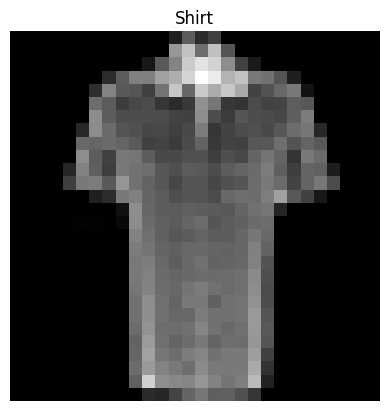

In [17]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f'Imagesize: {img.shape}')
print(f'Label: {label}, label size: {label.shape}')

# Model 0

In [18]:
# Create a flatten layer
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

x.shape, output.shape

(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [19]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [20]:
torch.manual_seed(42)

model0 = FashionMNISTModelV0(input_shape = 784,
                             hidden_units= 10,
                             output_shape=len(class_names)).to(device)

model0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
dummy_x = torch.rand([1,1,28,28])
model0(dummy_x).shape

torch.Size([1, 10])

# Setup loss and optimizer



In [22]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [23]:
from helper_functions import accuracy_fn

In [24]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr=0.01)

# Creating a function to time our experiments

In [25]:
from timeit import default_timer as timer

def print_train_time(start: float,
                      end: float,
                      device: torch.device = None):
  total_time = end - start
  print(f'Train time on {device}: {total_time:.3f} seconds\n')
  return total_time

# Creating a Training Loop and training on batches of data
1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss per batch.
3. Loop through testing batches, perform testing steps, calculate the test loss per batch.
4. Print out what's happening.
5. Time it all (for fun).

In [26]:
#import tqdm for progress bar

from tqdm.auto import tqdm

torch.manual_seed(42)
time_start = timer()

epochs = 5
for epoch in tqdm(range(epochs)):

  print(f'Epoch: {epoch}\n--------')

  train_loss = 0

  for batch, (X, y) in enumerate(train_dataloader):
    model0.train()

    y_pred= model0(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples')

  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0,0
  model0.eval()
  with torch.inference_mode():
      for X_test, y_test in test_dataloader:
        test_pred = model0(X_test)

        test_loss += loss_fn(test_pred, y_test)

        test_acc += accuracy_fn(y_true=y_test,
                                y_pred=test_pred.argmax(dim=1))
      test_loss /= len(test_dataloader)
      test_acc /= len(test_dataloader)

  print(f'\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} Test acc: {test_acc:.4f}')
  time_end = timer()
  time_total = print_train_time(start=time_start,
                                end=time_end,
                                device=str(next(model0.parameters()).device))

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.9096 | Test loss: 0.6290 Test acc: 78.6342
Train time on cpu: 16.580 seconds

Epoch: 1
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.5573 | Test loss: 0.5441 Test acc: 81.1302
Train time on cpu: 47.186 seconds

Epoch: 2
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.5027 | Test loss: 0.5137 Test acc: 81.9988
Train time on cpu: 70.376 seconds

Epoch: 3
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.4765 | Test loss: 0.4944 Test acc: 82.7875
Train t

# Make Predictions

In [27]:
def eval_mode(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X, y = X.to(device), y.to(device)

      y_pred = model(X)

      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}

model_0_results = eval_mode(model=model0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4836103618144989,
 'model_acc': 83.06709265175719}

In [28]:
from torch import nn
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x):
    return self.layer_stack(x)

In [29]:
torch.manual_seed(42)
model1 = FashionMNISTModelV1(input_shape=784,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)

next(model1.parameters()).device

device(type='cpu')

In [30]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model1.parameters(),
                                lr=0.1)

In [31]:
#import tqdm for progress bar

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):

  train_loss, train_acc = 0,0

  model.train()

  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    y_pred= model(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%')

In [32]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn,
              device: torch.device=device):

  test_loss, test_acc = 0,0

  model.eval()

  with torch.inference_mode():
    for X_test, y_test in data_loader:
      test_pred = model(X_test)

      test_loss += loss_fn(test_pred, y_test)

      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f'Test loss: {test_loss:.4f} Test acc: {test_acc:.2f}%')


In [33]:
#import tqdm for progress bar

from tqdm.auto import tqdm
from helper_functions import accuracy_fn

model1 = FashionMNISTModelV1(input_shape=784,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model1.parameters(),
                                lr=0.1)

torch.manual_seed(42)
time_start = timer()

epochs = 5
for epoch in tqdm(range(epochs)):

  print(f'Epoch: {epoch}\n--------')
  train_step(model=model1,
             data_loader=train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)

  test_step(model=model1,
             data_loader=test_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)


  time_end = timer()
  time_total = print_train_time(start=time_start,
                                end=time_end,
                                device=str(next(model1.parameters()).device))

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
--------
Train Loss: 0.9499 | Train Acc: 68.56%
Test loss: 0.7478 Test acc: 73.18%
Train time on cpu: 13.168 seconds

Epoch: 1
--------
Train Loss: 0.7072 | Train Acc: 74.20%
Test loss: 0.6929 Test acc: 74.85%
Train time on cpu: 25.451 seconds

Epoch: 2
--------
Train Loss: 0.6751 | Train Acc: 75.29%
Test loss: 0.6948 Test acc: 74.94%
Train time on cpu: 38.187 seconds

Epoch: 3
--------
Train Loss: 0.6570 | Train Acc: 75.86%
Test loss: 0.6856 Test acc: 75.07%
Train time on cpu: 50.361 seconds

Epoch: 4
--------
Train Loss: 0.6455 | Train Acc: 76.22%
Test loss: 0.6927 Test acc: 74.44%
Train time on cpu: 64.317 seconds



In [34]:
model1_results = eval_mode(model=model1,
                           data_loader = test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)

model1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6927279829978943,
 'model_acc': 74.4408945686901}

In [73]:
class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape:int,hidden_units:int, output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    #print(f'Output shape of conv_block_1: {x.shape}')
    x = self.conv_block_2(x)
    #print(f'Output shape of conv_block_2: {x.shape}')
    x = self.classifier(x)
    return x

In [74]:
torch.manual_seed(42)
model2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)


In [44]:
torch.manual_seed(42)

images = torch.randn(size=(32,3,64,64))
test_image = images[0]
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]")
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [38]:
test_image.shape

torch.Size([3, 64, 64])

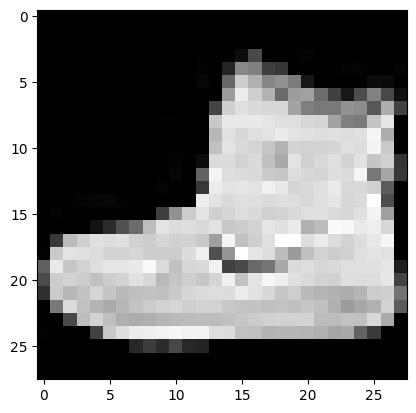

In [39]:
plt.imshow(image.squeeze(), cmap="gray")

In [57]:
model2(image)

Output shape of conv_block_1: torch.Size([10, 14, 14])
Output shape of conv_block_2: torch.Size([10, 7, 7])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x49 and 10x10)

In [50]:
rand_image = torch.randn(size=(1,28,28))

In [61]:
model2(rand_image.unsqueeze(0).to(device))

Output shape of conv_block_1: torch.Size([1, 10, 14, 14])
Output shape of conv_block_2: torch.Size([1, 10, 7, 7])


tensor([[ 0.0453, -0.0955,  0.0930, -0.0460,  0.0137,  0.0376, -0.0002,  0.0053,
         -0.0044, -0.0212]], grad_fn=<AddmmBackward0>)

# Train Convolutional Neural Network

In [75]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model2.parameters(),
                            lr=0.1)

In [76]:
from tqdm.auto import tqdm

torch.manual_seed(42)


time_start = timer()

epochs = 3
for epoch in tqdm(range(epochs)):

  print(f'Epoch: {epoch}\n--------')
  train_step(model=model2,
             data_loader=train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)

  test_step(model=model2,
             data_loader=test_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)


  time_end = timer()
  time_total = print_train_time(start=time_start,
                                end=time_end,
                                device=str(next(model2.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Train Loss: 0.5952 | Train Acc: 78.38%
Test loss: 0.3950 Test acc: 85.99%
Train time on cpu: 62.969 seconds

Epoch: 1
--------
Train Loss: 0.3654 | Train Acc: 86.90%
Test loss: 0.3524 Test acc: 86.91%
Train time on cpu: 135.258 seconds

Epoch: 2
--------
Train Loss: 0.3259 | Train Acc: 88.13%
Test loss: 0.3272 Test acc: 88.07%
Train time on cpu: 217.344 seconds



In [78]:
model2_results = eval_mode(
    model=model2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

model2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [79]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model1_results, model2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.483610,83.067093
1,FashionMNISTModelV1,0.692728,74.440895
2,FashionMNISTModelV2,0.327190,88.069089


# Make and evaluate random predictions with best model

In [81]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device= device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      pred_logit = model(sample)

      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      pred_probs.append(pred_prob)

  return torch.stack(pred_probs)

In [101]:
import random
#random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Sandal')

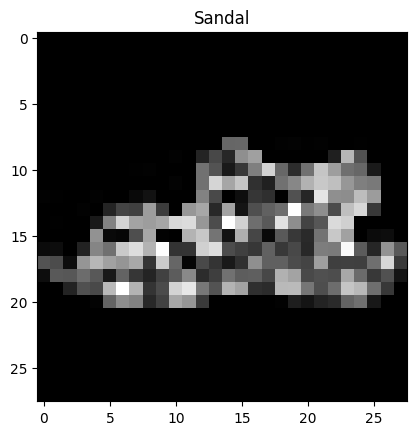

In [102]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [103]:
# make predictions

pred_probs = make_predictions(model=model2,
                              data=test_samples)

pred_probs[:2]

tensor([[4.8985e-06, 3.8091e-06, 1.7598e-05, 7.9796e-05, 4.0330e-05, 9.9875e-01,
         1.4651e-05, 5.5126e-04, 1.0631e-04, 4.2633e-04],
        [6.8429e-03, 3.5319e-05, 9.3410e-02, 5.7107e-03, 2.0758e-01, 2.2226e-05,
         6.8609e-01, 1.6528e-05, 2.5366e-04, 4.0201e-05]])

In [104]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 6, 6, 4, 3, 1, 2, 3, 6])

# Plot predictions

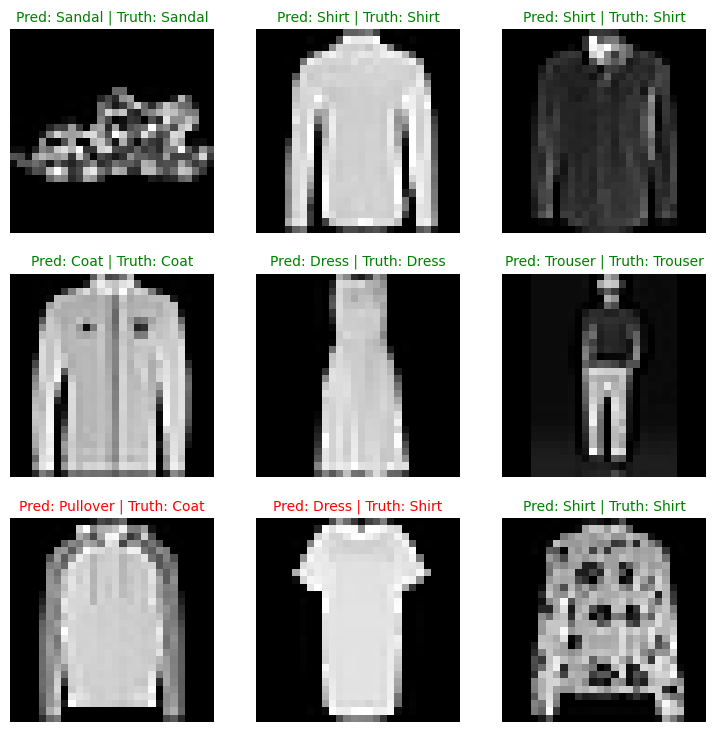

In [105]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap='gray')

  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]]

  title_text = f'Pred: {pred_label} | Truth: {truth_label}'

  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c='g') # if prediction is true green, otherwise red
  else:
    plt.title(title_text, fontsize=10, c='r')

  plt.axis(False);

# Make a confusion matrix

In [107]:
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [108]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 11.7 MB/s eta 0:00:00
mlxtend version: 0.23.1


In [109]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.1


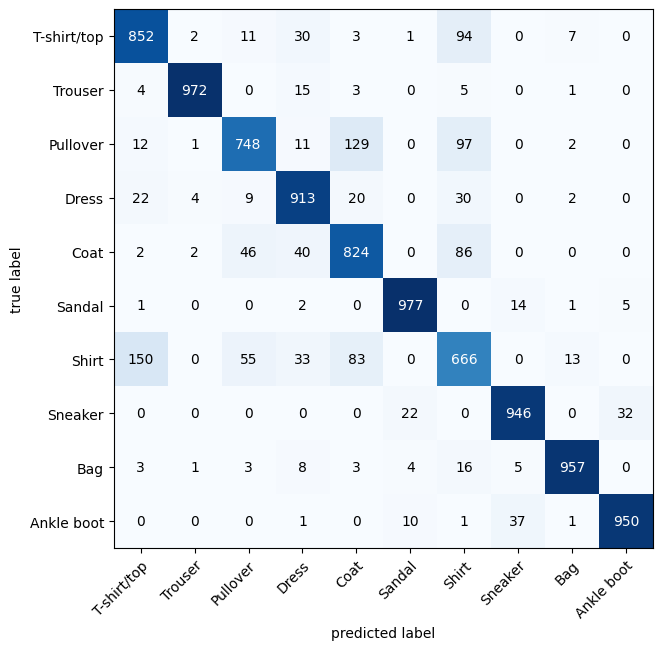

In [110]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);